# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
% matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


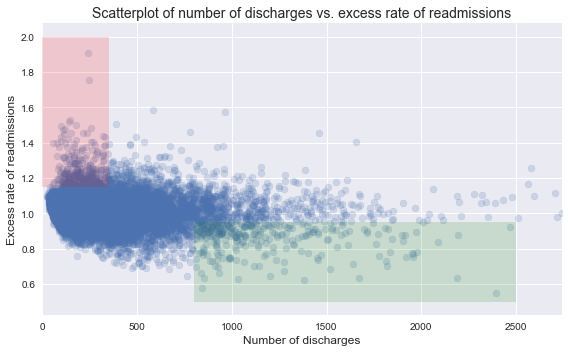

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

<div class="span5 alert alert-info">
<h3 id="Exercise">Exercise<a class="anchor-link" href="#Exercise">¶</a></h3>
<p>Include your work on the following <strong>in this notebook and submit to your Github account</strong>. </p>
<p>A. Do you agree with the above analysis and recommendations? Why or why not?</p>
<p>B. Provide support for your arguments and your own recommendations with a statistically sound analysis:</p>
<ol>
<li>Setup an appropriate hypothesis test.</li>
<li>Compute and report the observed significance value (or p-value).</li>
<li>Report statistical significance for α=.01. </li>
<li>Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</li>
<li>Look at the scatterplot above. <ul>
<li>What are the advantages and disadvantages of using this plot to convey information?</li>
<li>Construct another plot that conveys the same information in a more direct manner.</li>
</ul>
</li>
</ol>
<p>You can compose in notebook cells using Markdown: </p>
<ul>
<li>In the control panel at the top, choose Cell &gt; Cell Type &gt; Markdown</li>
<li>Markdown syntax: <a href="http://nestacms.com/docs/creating-content/markdown-cheat-sheet" target="_blank">http://nestacms.com/docs/creating-content/markdown-cheat-sheet</a>
</li></ul>
</div>

In [5]:
# Your turn

In [6]:
# clean the table further. The Excess Readmission Ratio is NaN value
#clean_hospital_read_df=clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio']>0]
clean_hospital_read_df=clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [7]:
final_df= clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
final_df.rename(columns={'Number of Discharges': 'Number_Discharges', 'Excess Readmission Ratio': 'Excess_Readmission_Ratio'}, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [8]:
clean_hospital_read_df.head()
#final_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Number_Discharges           11497 non-null int32
Excess_Readmission_Ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


In [10]:
final_df.describe()

,Number_Discharges,Excess_Readmission_Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


<div class="span5 alert alert-info">
A. Do you agree with the above analysis and recommendations? Why or why not?
</div>

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b>The analysis seems to be giving the correct indincation but it is just based on graph data and so further infernetial statistics should applied to get conclusion. 
<br/>. The conclusion is given for either gor less then 100 or greater then 1000 but it is huge range in middle to not consider or analyze.
<br/>. The recommandation based on 300 is not very clear from the graph.
<br/>Also as done above more data cleaning seems to be required. 
<br/>
<b> Hypothesis testing will be formed further to confirm the results</b>

</div>

<div class="span5 alert alert-info">
<ol>
<li>Setup an appropriate hypothesis test.</li>
</ol>
</div>

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'>
<b>Hypothesis</b>
<br>
<i>The Null Hypothesis</i> : There is <b>NO</b> significant difference between rate of readmissions and number of discharges.
<br>
<i>The alternate Hypothesis</i> : There is a   significant difference between rate of readmissions and number of discharges.
</div>

<div class="span5 alert alert-info">
<ol start='2'>
<li>Compute and report the observed significance value (or p-value).</li>
</ol>
</div>

In [11]:
low_readmission=final_df[final_df.Excess_Readmission_Ratio<=1]
high_readmission=final_df[final_df.Excess_Readmission_Ratio>1]

In [12]:
low_readmission.describe()

,Number_Discharges,Excess_Readmission_Ratio
count,5558.000000,5558.000000
mean,381.295250,0.937418
std,322.753963,0.054024
min,51.000000,0.549500
25%,168.000000,0.912900
50%,294.000000,0.950550
75%,489.000000,0.977100
max,6793.000000,1.000000


In [13]:
high_readmission.describe()

,Number_Discharges,Excess_Readmission_Ratio
count,5939.000000,5939.000000
mean,350.652635,1.073093
std,294.309313,0.068862
min,25.000000,1.000100
25%,151.000000,1.025800
50%,269.000000,1.056200
75%,460.500000,1.097800
max,3570.000000,1.909500


In [14]:
mean_low_high =low_readmission.Number_Discharges.mean()-high_readmission.Number_Discharges.mean()
mean_low_high

30.64261496620219

In [15]:
var_low,var_high =low_readmission.Number_Discharges.var(),high_readmission.Number_Discharges.var()
#np.sqrt(len())
len_low,len_high=len(low_readmission),len(high_readmission)
var_low_high =(var_low/len_low) + (var_high/len_high)
sd_low_high=np.sqrt(var_low_high)
sd_low_high

5.7729524962719259

In [16]:
z_score = (mean_low_high-0)/sd_low_high
z_score

5.3079624310074722

In [17]:

p_value = scipy.stats.norm.sf(abs(z_score))*2
print('The p value from the z value above is %.12f' %float(p_value))

The p value from the z value above is 0.000000110857


<div class="span5 alert alert-info">
<ol start='3'>
<li>Report statistical significance for α=.01. </li>
</ol>
</div>

In [18]:
z_crit = stats.norm.ppf(q=0.01)
z_crit

-2.3263478740408408

In [19]:
# 1 % chance for confidence interval 
conf_interval= z_crit*sd_low_high

In [20]:
mean_low_high+np.array([-1, 1]) * conf_interval

array([ 44.07251073,  17.2127192 ])

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> With  α=.01 the readmission value is between  <b>17.2127192  & 44.07251073 </b></div>

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> The calulcated z-score is higher then 1 % significant value hence <b>reject</b> the null hypothesis.</div>

<div class="span5 alert alert-info">
<ol start='4'>
<li>Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</li>

</li>
</ol>
</div>

In [21]:
r_adm_dis=(final_df.corr()).iloc[0][1]
r_adm_dis

-0.09739794351079363

In [22]:
scipy.stats.pearsonr(final_df.Number_Discharges, final_df.Excess_Readmission_Ratio)

(-0.097397943510793533, 1.222547377680967e-25)

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> The calcluated value above tell us that there is negative corelation between two values. And hence the number of discharge and excess re admission are related. </div>

<div class="span5 alert alert-info">
<ol start='5'>
<li>Look at the scatterplot above. <ul>
<li>What are the advantages and disadvantages of using this plot to convey information?</li>
</ul>
</li>
</ol>
</div>

 

<div class="span5 alert alert-info" style='background-color:#ffff66; color:black'><b>Answer :</b> <br/>
<b>Advantage:</b>It does show the entire population and highlights the areas of focus.
<br/><b>Disadvantage:</b>A trendline will add value to grapph.
</div>

<div class="span5 alert alert-info">
<ol start='5'>
<li>Look at the scatterplot above. <ul>
<li>Construct another plot that conveys the same information in a more direct manner.</li>
</ul>
</li>
</ol>
</div>

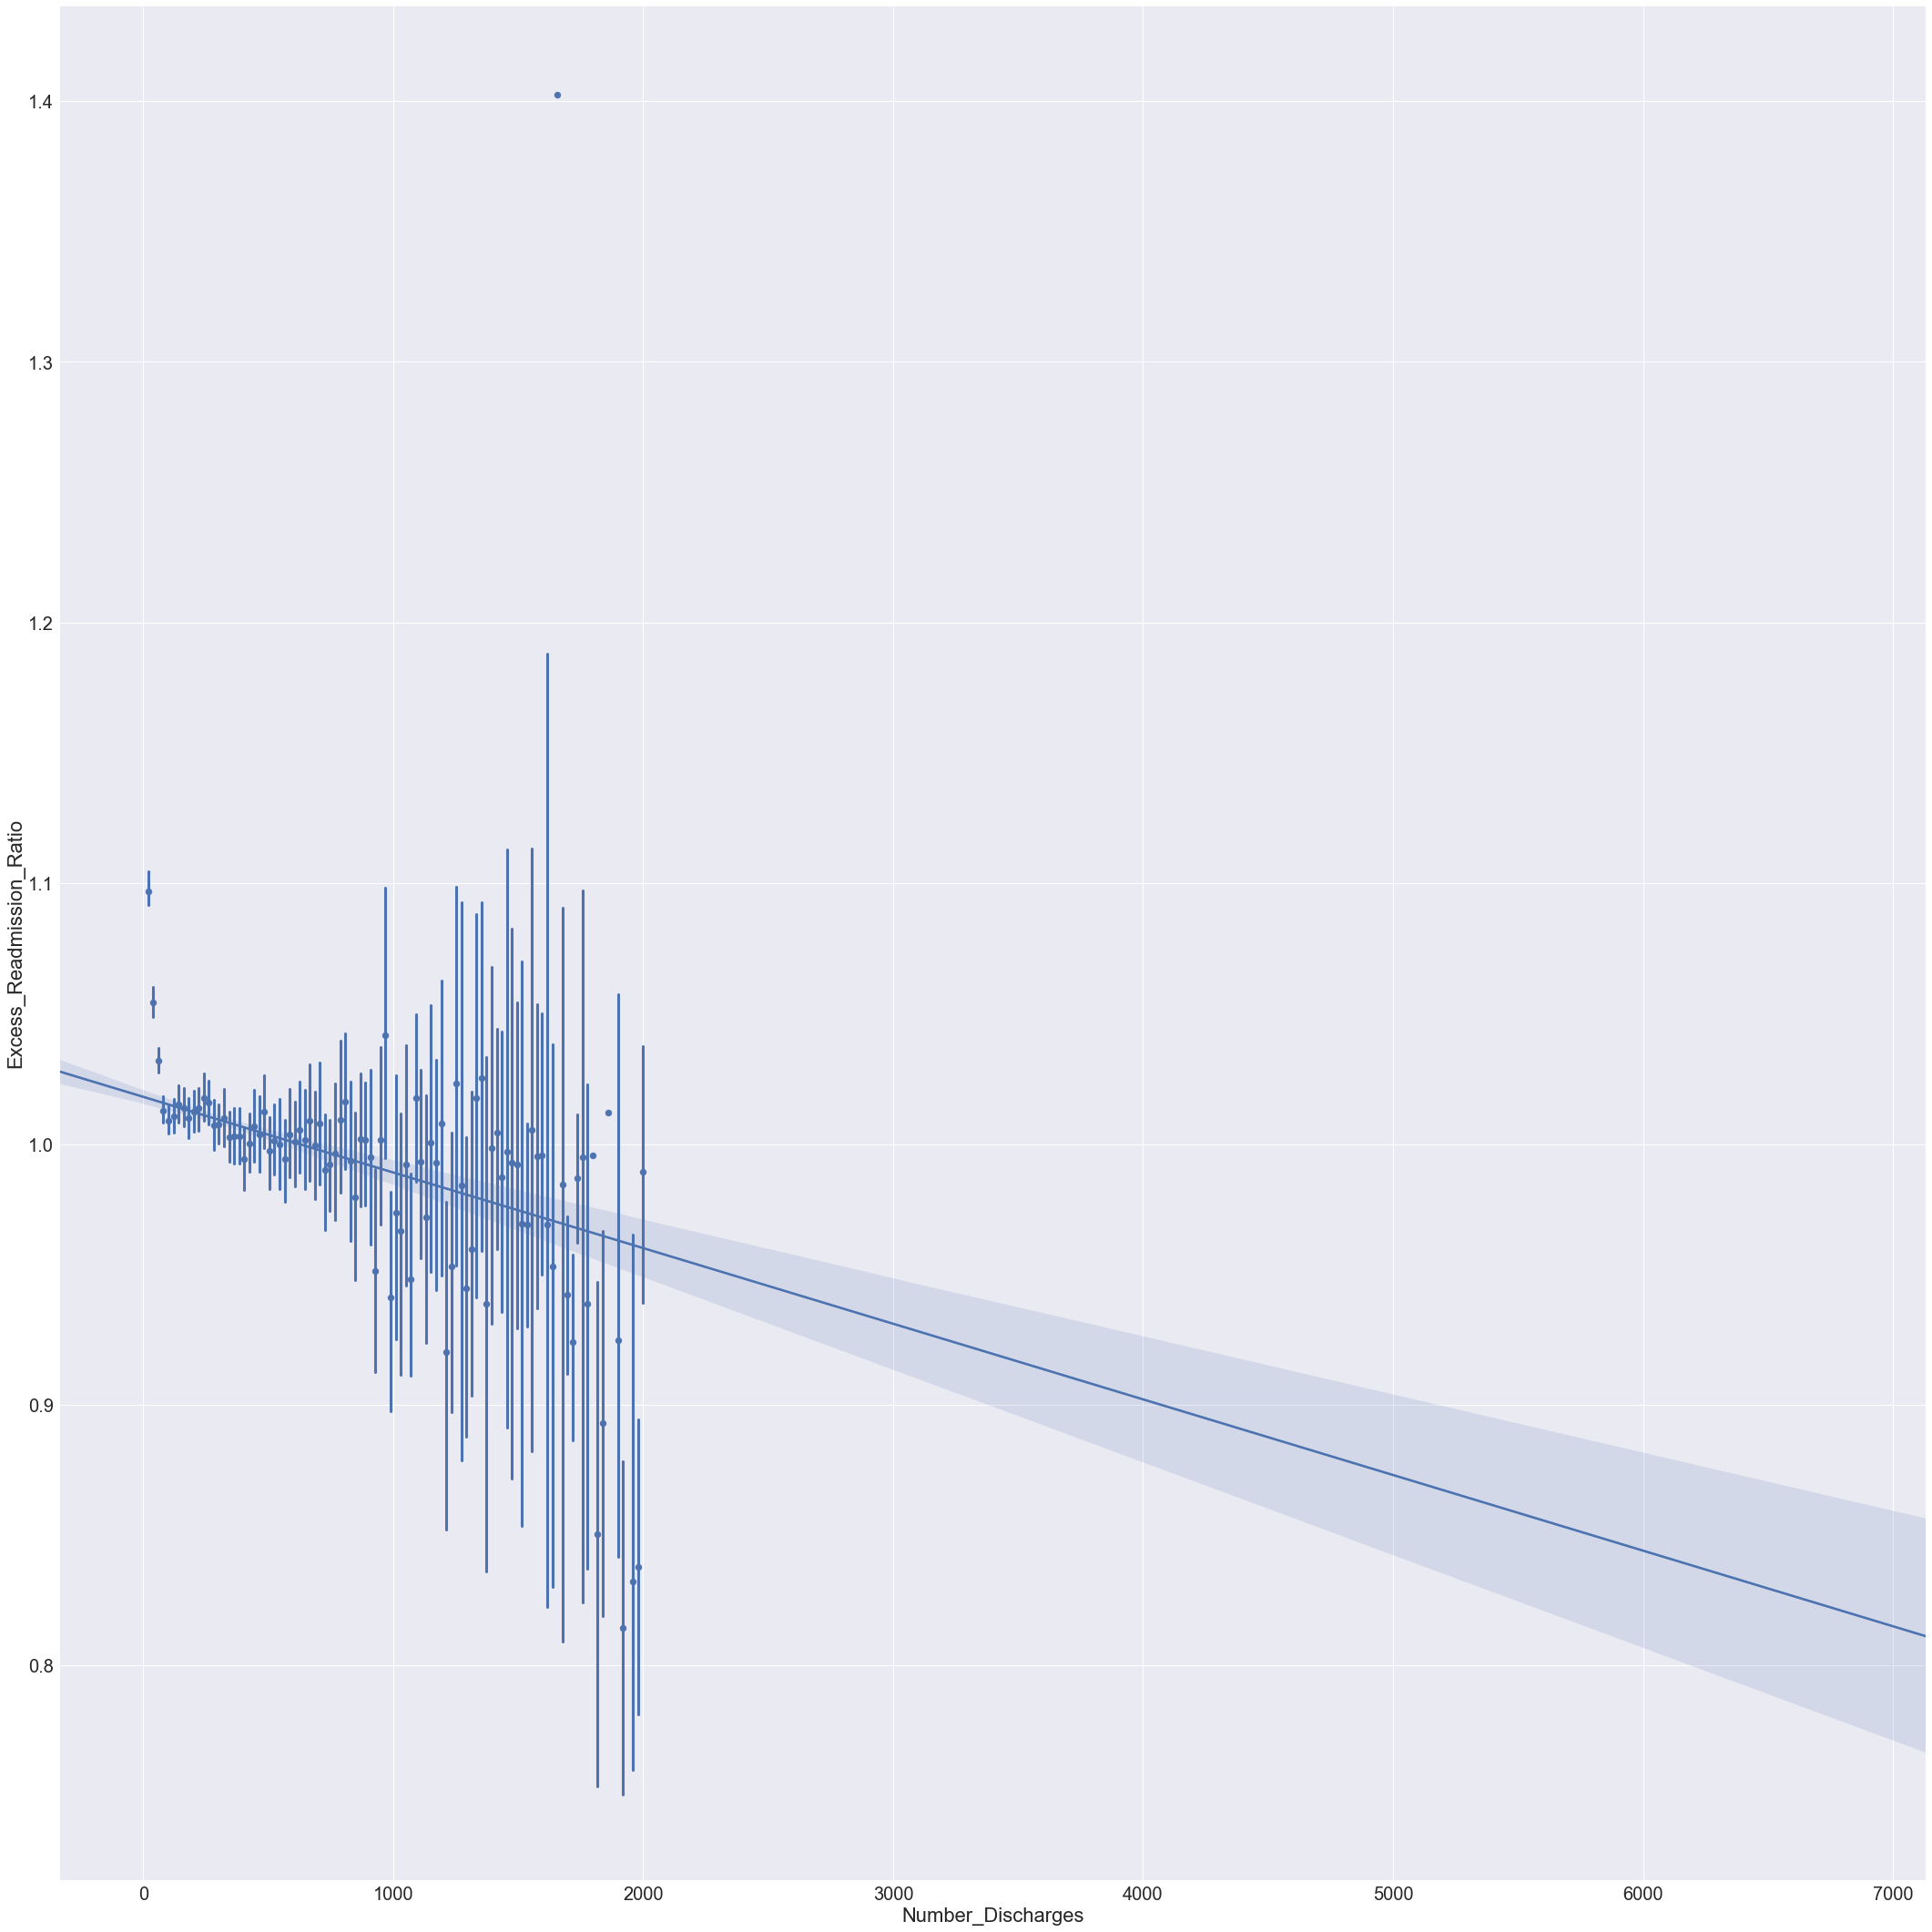

In [24]:
#plt.figure(figsize=(20,12))
#f, ax = plt.subplots(figsize=(20,12))
bin_plot =np.linspace(0,2000,num=100)
sns.set(font_scale = 2)
sns.lmplot('Number_Discharges','Excess_Readmission_Ratio',data=final_df, x_jitter=.05,x_bins=bin_plot, size=30)
#sns.regplot('Number_Discharges','Excess_Readmission_Ratio',data=final_df, x_jitter=.05, ax=ax)

In [ ]:
#help(sns.lmplot)